# Polish Voivodeship similarity

As a Polish native, some time ago I started to think what voivodeships are similar or unsimilar to eachother. In Poland we have something called <b> Central Statistical Office </b> (Główny Urząd Statystyczny), which gather all the information in which you can download the data aggregated to a particular level. In this project we will try to say, what voievodeships are similar to eachoter using:

- Mean price of a 1L of Gas,
- Number of libraries,
- Income of a voivodeship,
- Number of ecological households,
- The amount of energy used in GJ,
- Amount of money per 1 person,
- Amount of people per $1km^2$,
- Number of flats in all of the markets,
- Number of hotels open 24/7,
- Number of bus stops,
- Number of graduates (masters),
- Number of Vacancies.

All the data is aggregated per Voivodeship. What's also important to bring, we're using the data for 2022 year.
You can check a lot more of the data by checking this link: https://bdl.stat.gov.pl/bdl/dane/podgrup/temat


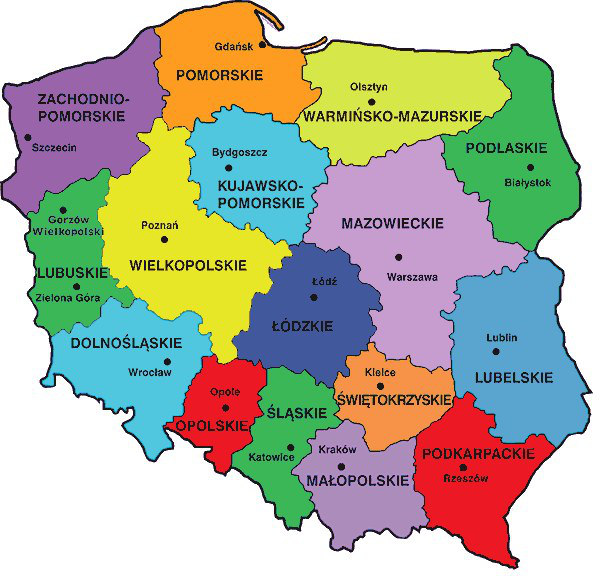

In [1]:
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display

im = Image.open(requests.get('https://i.iplsc.com/polska-podzial-administracyjny-1999-16-wojewodztw/000540V1298BWNKX-C122-F4.jpg', stream=True).raw)
display(im)

# 1. Necessary imports to perfrom Data Analysis and EDA

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

# 2. Data Imports and Data Cleaning

In [4]:
gas = pd.read_csv('Benzyna.csv',sep=';')
lib = pd.read_csv('Biblioteki.csv',sep=';')
fin_voi = pd.read_csv('Dochody_Woj.csv',sep=';')
eco = pd.read_csv('Eko.csv',sep=';')
ene = pd.read_csv('Energia.csv',sep=';')
fin = pd.read_csv('Finanse.csv',sep=';')
peo = pd.read_csv('Ludnosc.csv',sep=';')
fla = pd.read_csv('Mieszkania.csv',sep=';')
nig = pd.read_csv('Noclegi.csv',sep=';')
sto = pd.read_csv('Przystanki.csv', sep=';')
sch = pd.read_csv('Szkolnictwo.csv',sep=';')
vac = pd.read_csv('Wolne_Miejsca_Pracy.csv',sep=';')




In [5]:
data_frames = [lib, fin_voi, eco, ene, fin, peo, fla, nig, sto, sch, vac]
gas = gas[gas.columns[1:3]]
for frame in data_frames:
    data = frame[frame.columns[1:3]]
    gas = gas.merge(data, left_on='Nazwa', right_on='Nazwa')







In [6]:
main_data = gas.copy()


In [7]:
main_data.rename(columns={
    'benzyna silnikowa bezołowiowa, 95-oktanowa - za 1l;2022;[zł]':'Mean price of Gas (PLN)',
    'biblioteki i filie;2022;[ob.]':'Number of Libraries',
    'ogółem;2022;[zł]_x':'Income_Voi',
    'gospodarstwa ogółem;gospodarstwa;2022;[-]':'Eco Households',
    'ogółem;ogółem;2022;[GJ]':'Energy Used (GJ)',
    'ogółem;2022;[zł]_y':'Expanses per person',
    'ludność na 1 km2;2022;[osoba]':'People per 1km2',
    'ogółem;ogółem;2022;[szt.]':'Number of Flats',
    'ogółem;obiekty całoroczne lipiec;2022;[ob.]':'Hotels 24_7',
    'przystanki autobusowe ( z trolejbusowymi);ogółem;2022;[szt.]':'Number of Bus Stops',
    'absolwenci studiów na poziomie magisterskim;2022;[osoba]':'Number of masters graduates',
    'wolne miejsca pracy;2022;[tysiąc]':'Number of Vacancies',
    'Nazwa':'Voivodeship'
}, inplace=True)




In [8]:
main_data.info() # All the data except Voivodeship should be in float format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Voivodeship                  16 non-null     object
 1   Mean price of Gas (PLN)      16 non-null     object
 2   Number of Libraries          16 non-null     int64 
 3   Income_Voi                   16 non-null     object
 4   Eco Households               16 non-null     int64 
 5   Energy Used (GJ)             16 non-null     int64 
 6   Expanses per person          16 non-null     object
 7   People per 1km2              16 non-null     object
 8   Number of Flats              16 non-null     int64 
 9   Hotels 24_7                  16 non-null     int64 
 10  Number of Bus Stops          16 non-null     int64 
 11  Number of masters graduates  16 non-null     int64 
 12  Number of Vacancies          16 non-null     object
dtypes: int64(7), object(6)
memory usage: 

In [9]:
for col in main_data[main_data.columns[1:]]:
    if main_data[col].dtype == 'object':
        main_data[col] = main_data[col].str.replace(',','.').astype(float)
        

In [10]:
main_data.head()

,Voivodeship,Mean price of Gas (PLN),Number of Libraries,Income_Voi,Eco Households,Energy Used (GJ),Expanses per person,People per 1km2,Number of Flats,Hotels 24_7,Number of Bus Stops,Number of masters graduates,Number of Vacancies
0,DOLNOŚLĄSKIE,6.70,574,1.674106e+09,761,14336806,516.96,144.8,26707,873,11693,12969,13.7
1,KUJAWSKO-POMORSKIE,6.70,381,1.574301e+09,420,9474132,754.53,111.7,9495,314,11254,5376,4.9
2,LUBELSKIE,6.69,560,1.328006e+09,1926,7817466,556.96,80.6,7300,297,12773,8194,2.9
3,LUBUSKIE,6.74,239,6.845755e+08,1139,3563818,698.27,70.1,6241,187,3564,1323,3.2
4,ŁÓDZKIE,6.65,453,1.341831e+09,538,14944756,552.43,130.5,11029,248,11789,6797,6.6


In [11]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Voivodeship                  16 non-null     object 
 1   Mean price of Gas (PLN)      16 non-null     float64
 2   Number of Libraries          16 non-null     int64  
 3   Income_Voi                   16 non-null     float64
 4   Eco Households               16 non-null     int64  
 5   Energy Used (GJ)             16 non-null     int64  
 6   Expanses per person          16 non-null     float64
 7   People per 1km2              16 non-null     float64
 8   Number of Flats              16 non-null     int64  
 9   Hotels 24_7                  16 non-null     int64  
 10  Number of Bus Stops          16 non-null     int64  
 11  Number of masters graduates  16 non-null     int64  
 12  Number of Vacancies          16 non-null     float64
dtypes: float64(5), int64(7

In [12]:
main_data.isnull().sum()

Voivodeship                    0
Mean price of Gas (PLN)        0
Number of Libraries            0
Income_Voi                     0
Eco Households                 0
Energy Used (GJ)               0
Expanses per person            0
People per 1km2                0
Number of Flats                0
Hotels 24_7                    0
Number of Bus Stops            0
Number of masters graduates    0
Number of Vacancies            0
dtype: int64

Data is ready to perform Visualisation and Exploration.

# 3. Data Visualisation

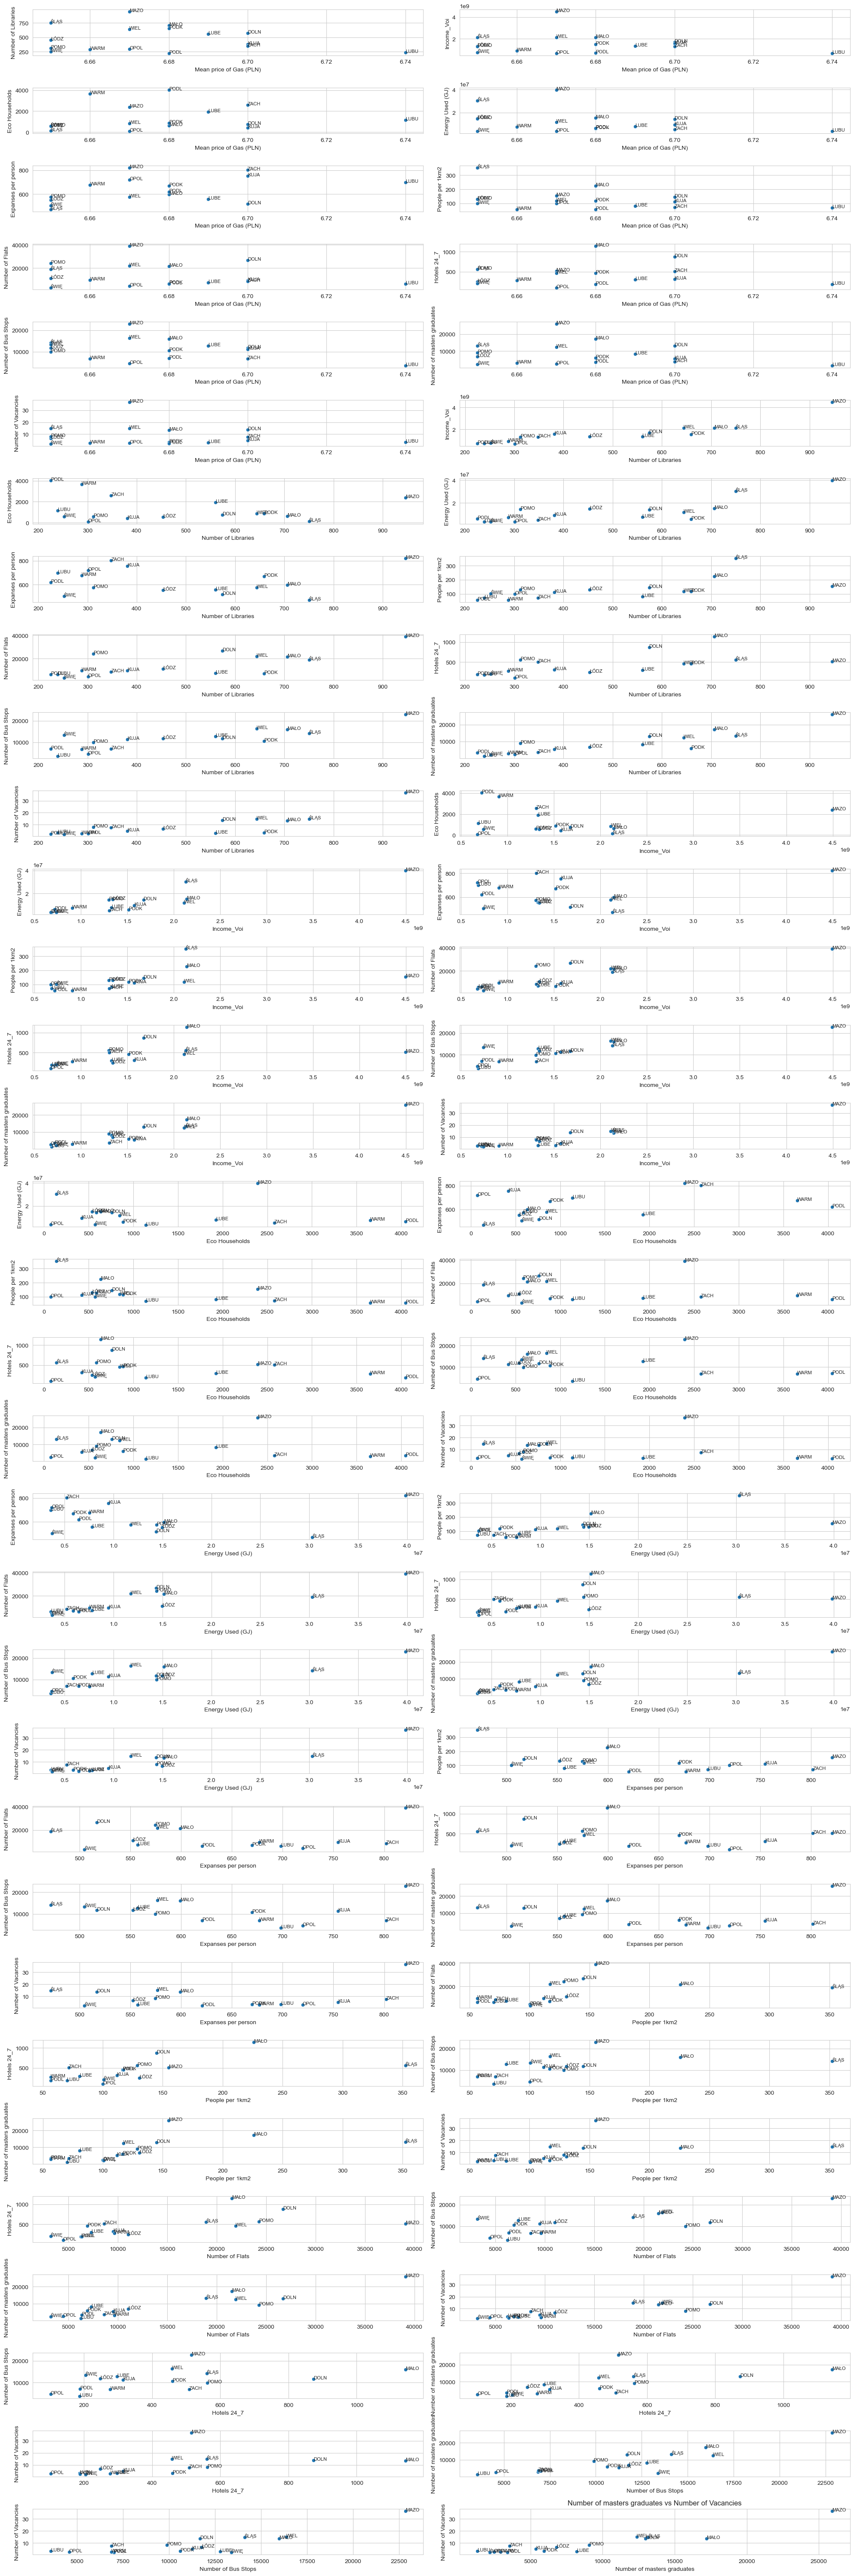

In [13]:


pairs = []
fig, axes = plt.subplots(nrows=33, ncols=2, figsize=(20, 60))

for i in range(len(main_data.columns)):
    for j in range(len(main_data.columns)):
        if i == j or main_data.columns[i] == 'Voivodeship' or main_data.columns[j] == 'Voivodeship':
            pass
        else:
            x = tuple(sorted([main_data.columns[i], main_data.columns[j]]))
            if x in pairs:
                pass
            else:
                pairs.append(x)

                row_index = (len(pairs) - 1) // 2  
                col_index = (len(pairs) - 1) % 2  
                sns.scatterplot(data=main_data, x=main_data.columns[i], y=main_data.columns[j], ax=axes[row_index, col_index])
                plt.title(f"{main_data.columns[i]} vs {main_data.columns[j]}")


                for index, row in main_data.iterrows():
                    axes[row_index, col_index].text(row[main_data.columns[i]], row[main_data.columns[j]], row['Voivodeship'][0:4], fontsize=8)

plt.tight_layout()
plt.show()


Based on that we can say:

- We expect, that voivodeship: Mazowieckie will be a class of itself. It's caused beacuse there's capital of Poland - Warsaw,
- We expect, that our data will be clustered in 3/4 clusters,
- Lubuskie, Opolskie, Podlaskie, Świętokrzyskie, Lubelskie, Warmińsko - Mazurskie seems to be in one cluster. Those voivodeships seems to be most similar to eachother.

In general we can see, that some voivodeships seems to be similar or unsimiliar to eachother. 

Lets check the correlation between variables.

Text(0.5, 1.0, 'Correlation Between Variables.')

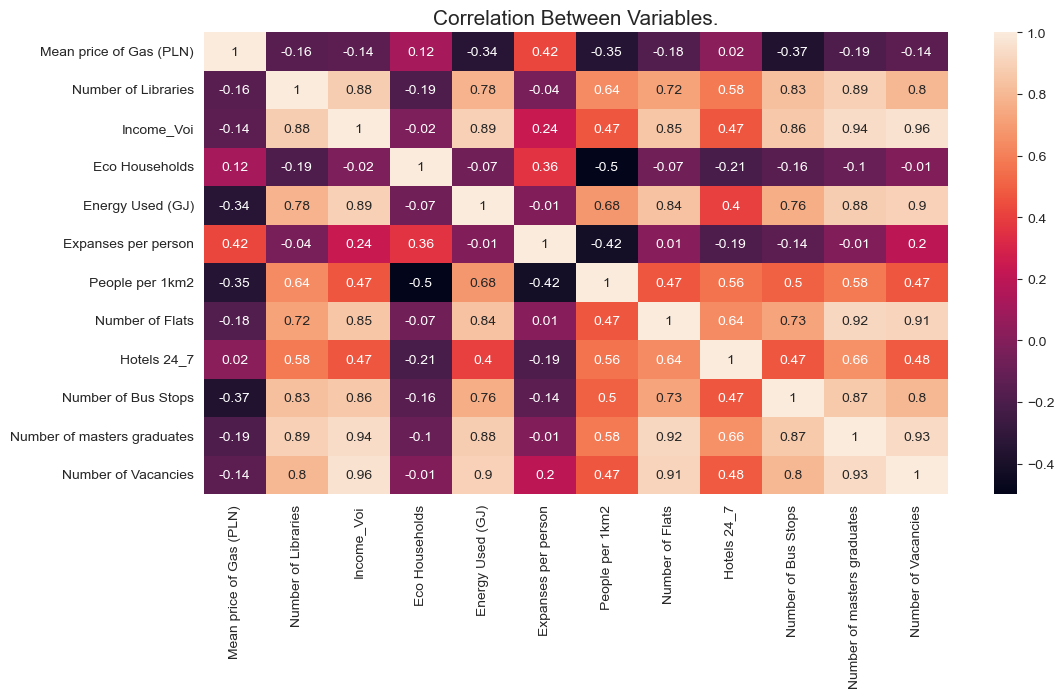

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(round(main_data.drop('Voivodeship',axis=1).corr(),2), fmt='g', annot=True)
plt.title("Correlation Between Variables.",fontsize=15)

We cab see that variable Income_Voi (general incombe by Voivodeship) is highly correlated with most of the variables. Only two variables Eco Households and Mean price of Gas don't have almosy any correlation with the income. However in general most of our variables is connected to eachother.

# 4. Clustering.

# 4.1 PCA   

First thing we will try to do, is to reduce the dimensions with our data. To check if we can visualise the data in some pretty way. To do this we will use <b> Principal Component Analysis (PCA) </b>

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
X_raw = main_data.drop('Voivodeship',axis=1)
scaler = StandardScaler()
scaler.fit(X_raw)
X_standard_scaled = scaler.transform(X_raw)

In [17]:
pca = PCA(n_components=len(X_raw.columns)) #We will use number of components equal to number of features

pca.fit(X_standard_scaled)

X_pca = pca.transform(X_standard_scaled)

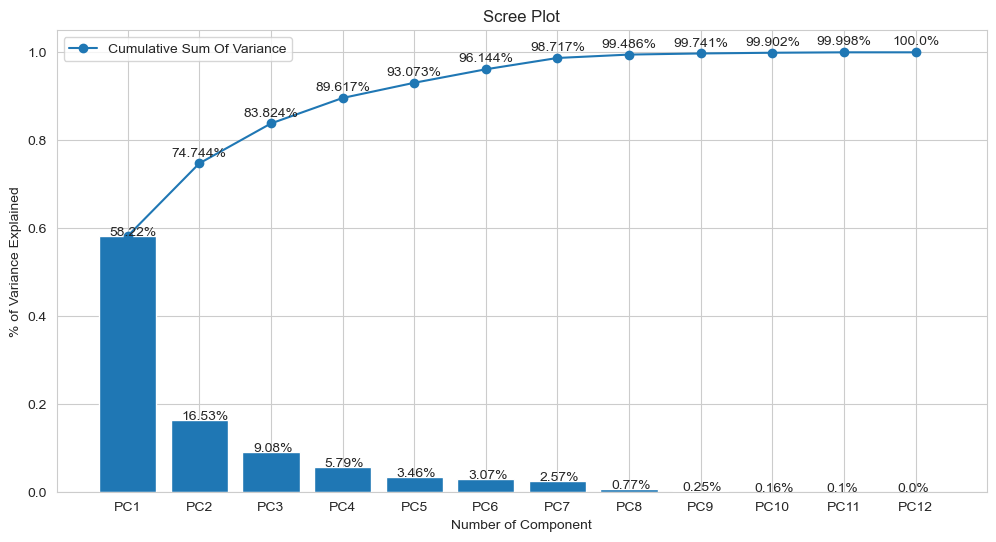

In [18]:
plt.figure(figsize=(12,6))
bars = plt.bar(x=['PC'+str(x+1) for x in range(len(pca.explained_variance_ratio_))], height=pca.explained_variance_ratio_)
cumsum = np.cumsum(pca.explained_variance_ratio_)

for bar in bars:
    y_value = bar.get_height()
    x_value = bar.get_x()
    plt.text(x_value +0.15,y_value,str(round(y_value*100,2))+'%')
    
plt.title("Scree Plot")
plt.ylabel("% of Variance Explained")
plt.xlabel("Number of Component")


lines = plt.plot(cumsum, marker='o', label='Cumulative Sum Of Variance')

for i in range(1, len(cumsum)):
    plt.annotate(str(round(cumsum[i]*100,3))+'%',
                 (i,cumsum[i]),
                 xytext=(0,5),
                 textcoords='offset points',
                 ha='center')


plt.legend()
    

We can see that just two dimensions are responsible for a 74.74% of variance. It's a decent outcome. Let's see if we can visualise this.

Text(0.5, 1.0, 'Data after reduced Dimensions')

<Figure size 1200x600 with 0 Axes>

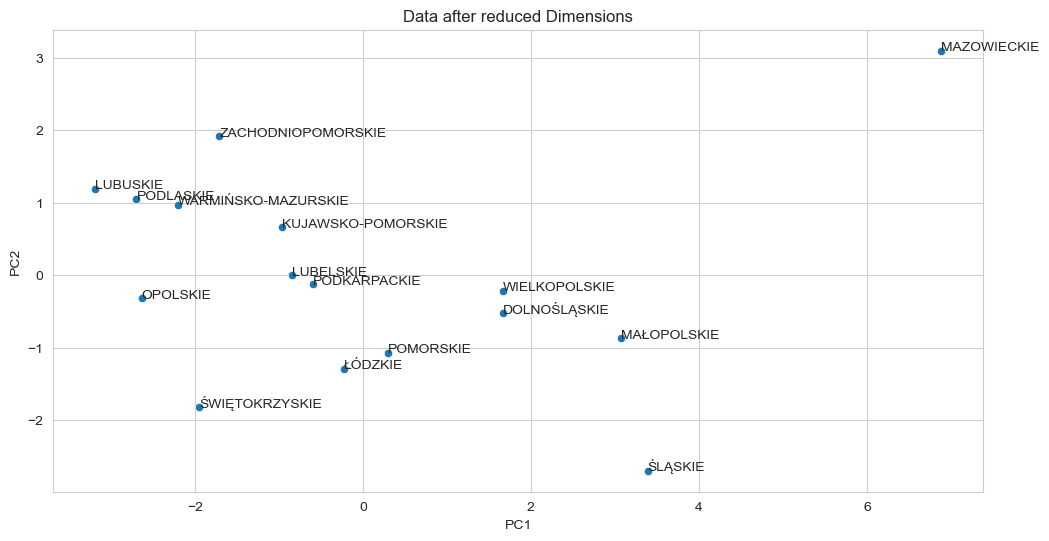

In [19]:
voivode_pca = pd.DataFrame({
    'PC1':X_pca[:,0],
    'PC2':X_pca[:,1],
    'Voivoideship':main_data['Voivodeship']
})

plt.figure(figsize=(12,6))

plt.figure(figsize=(12,6))

scatter = sns.scatterplot(data=voivode_pca, x='PC1', y='PC2')

for i, row in enumerate(voivode_pca['Voivoideship']):
    plt.text(voivode_pca['PC1'][i], voivode_pca['PC2'][i],voivode_pca['Voivoideship'][i])
plt.title("Data after reduced Dimensions")

Just as we expected, Mazowieckie is a class in itself. We can also see that, there's a little bit of dense space near the Lubelskie voivodeship, means that there's a lot of similar voivodeships to the Lubelskie. In my own look, I will group voivodeships like this:

- Cluster 1: (Lubuskie, Zachodniopomorskie, Lubuskie, Podlaskie, Kujawsko-Pomorskie, Lubelskie, Podkarpackie, Opolskie, Łódzkie, Świętokrzyskie, Pomorskie)
- Cluster 2: (Wielkopolskie, Dolnoścląskie, Małopolskie, Śląskie)
- Cluster 3: (Mazowieckie)

However, we can see that there's a cluster with 1 observation, and 1 cluster with 11 records. We dont want that, so we will try perform some other methods of clustering.


# 4.2 K-Means Clustering

In this part, we will try to Cluster the data using K-Means algorithm. It's one of the most popular algorithms that you can use for clustering, since it's very easy to understand, and also can be very intuitive since the output is very similar to the classification problem.

In [20]:
from sklearn.cluster import KMeans

First, we will try to fit the PCA scaled values.

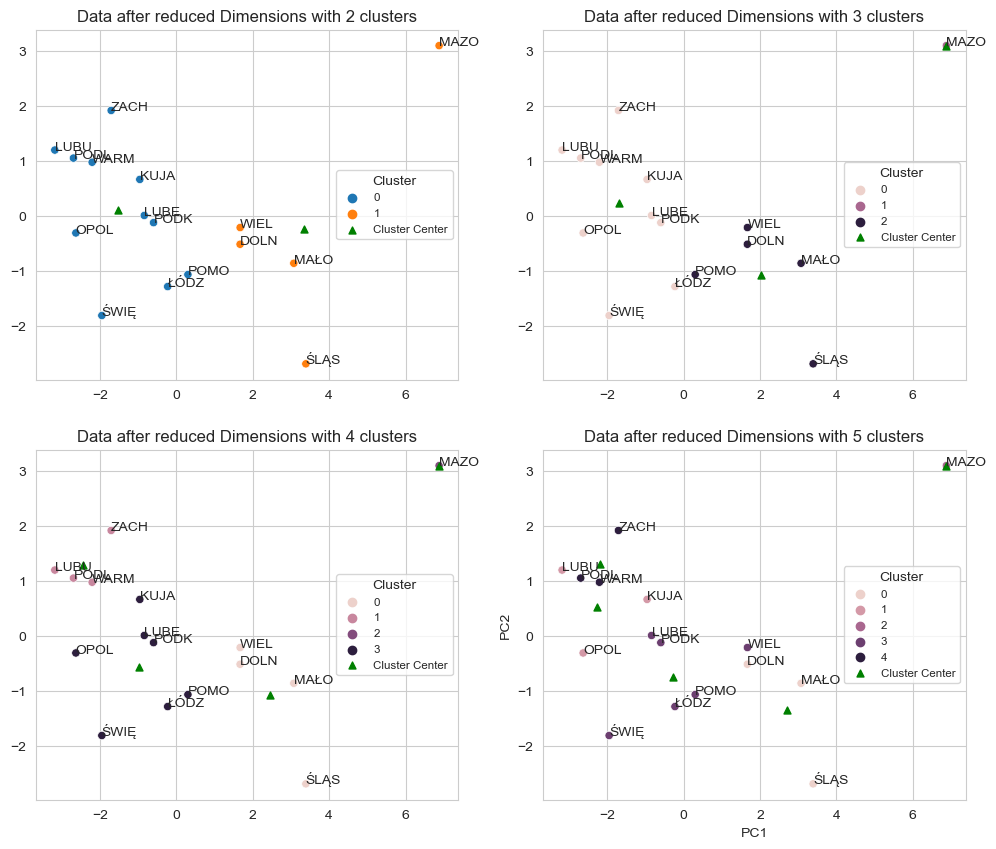

In [63]:


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for cluster, axes in zip(range(2, 6), ax.flatten()):

    Kmean = KMeans(n_clusters=cluster)

    Kmean.fit(X_pca)

    Kmean.predict(X_pca)

    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=Kmean.labels_, ax=axes)
    plt.xlabel('PC1')
    plt.ylabel('PC2')

    for i, row in enumerate(voivode_pca['Voivoideship']):
        axes.text(voivode_pca['PC1'][i], voivode_pca['PC2'][i], voivode_pca['Voivoideship'][i][0:4])

    axes.scatter(Kmean.cluster_centers_[:, 0], Kmean.cluster_centers_[:, 1], marker='^', s=25, c='green', label='Cluster Center')

    axes.set_title(f"Data after reduced Dimensions with {cluster} clusters")
    axes.legend(loc='center right', title='Cluster', fontsize='small')



After analysing the Data, it seems that the best n of clusters is equal to 4. But voivodeship "MAZO" (Mazowicikie) it's still an cluster of it's own. Let's try using the Hierarhical CLustering.

# 4.3 Hierarchical Clustering - Ward Method



Hierarchical is an alternative way of clustering. Every of the hierarchical algorithm works almost the same.
- It starts from declaring each point as a cluster,
- Merge most similar clusters till the stop criterium is met. (Most of the time is n of clusters)

We will try to use the Ward method, to determine, which of our voivodeships are similar.



First, lets try with PCA modified values.

In [23]:
from scipy.cluster.hierarchy import dendrogram, ward

Text(0.5, 1.0, 'Dendrogram with PCA modified values.')

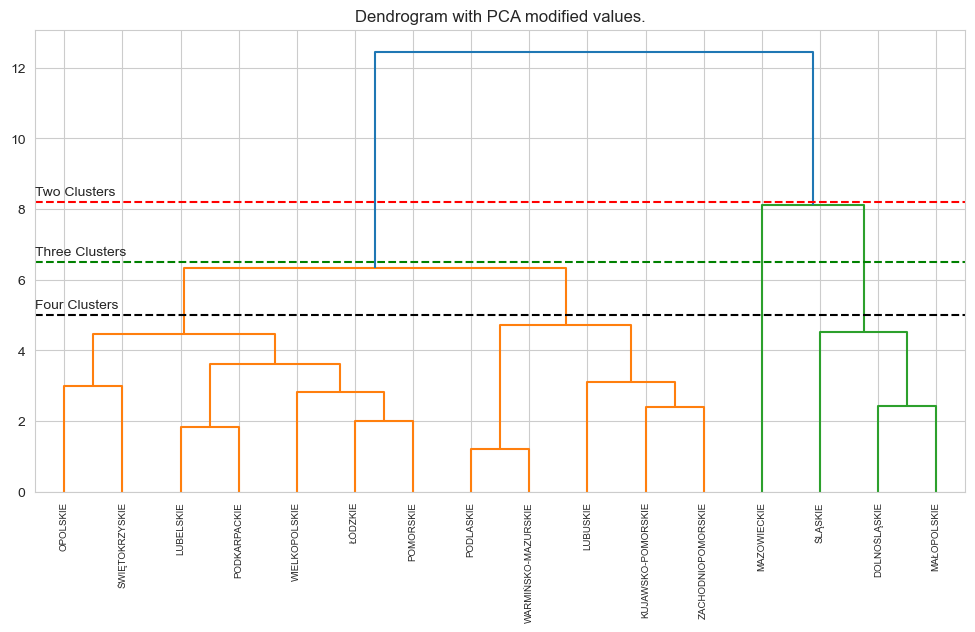

In [58]:
plt.figure(figsize=(12,6))
linkage_array = ward(X_pca)
voivodeships = list(main_data['Voivodeship'])
dendrogram(linkage_array, labels=voivodeships, leaf_font_size=7)
plt.xticks(rotation=90);
plt.axhline(8.2, linestyle='--', c='red')
plt.text(0,8.4,'Two Clusters');
plt.axhline(6.5, c='green', linestyle='--')
plt.text(0,6.7, 'Three Clusters')
plt.axhline(5,c='black', linestyle = '--')
plt.text(0,5.2,'Four Clusters');
plt.title("Dendrogram with PCA modified values.")


Next, lets try with the Standard Scaled values.

Text(0.5, 1.0, 'Dendrogram with Standard Scaled values.')

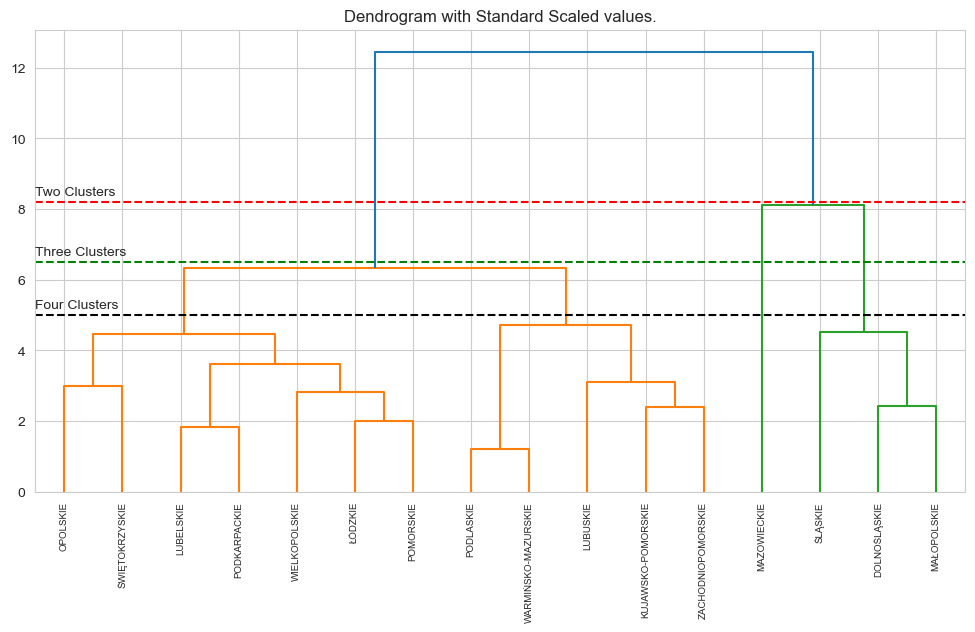

In [62]:
plt.figure(figsize=(12,6))
linkage_array = ward(X_standard_scaled)
voivodeships = list(main_data['Voivodeship'])
dendrogram(linkage_array, labels=voivodeships, leaf_font_size=7)
plt.xticks(rotation=90);
plt.axhline(8.2, linestyle='--', c='red')
plt.text(0,8.4,'Two Clusters');
plt.axhline(6.5, c='green', linestyle='--')
plt.text(0,6.7, 'Three Clusters')
plt.axhline(5,c='black', linestyle = '--')
plt.text(0,5.2,'Four Clusters');
plt.title("Dendrogram with Standard Scaled values.")


We can see that dendrogram with PCA modified values and Standard Scaled Values are practicaly the same. The best idea it's to probably divide our data by 4 clusters but again, voivodeship Mazowieckie is a cluster on it's own. We can also see, that Ward method gives us slightly different results than a K-Means algorithm. In the next step we will try do perform a DBSCAN.

# 4.4 DBSCAN

DBSCAN (Density-based spatial clustering of application with noise). It's also one of the most popular algorithms in terms of clustering. We doesn't need to set the number of clusters, and it can identify clusters with very unnatural shapes, it can also identify points that aren't part of a cluster (noise points).
DBSCAN contains two parameters:
- min_samples,
- eps

If there's min_samples (or more) points within the eps distance, the sample is called "Main sample".
If there's less points than <b> min samples </b> within the <b> eps </b> distance, the point is considered as a noise.

In [64]:
from sklearn.cluster import DBSCAN

In [67]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_pca)
print(clusters)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


Output -1 means, that all of our voivodeships is marked as a noise. It's a consequence of the parameters <b><a>min_samples</a></b> and <b><a>eps</a></b>. In next part we will try to set the right parameters.

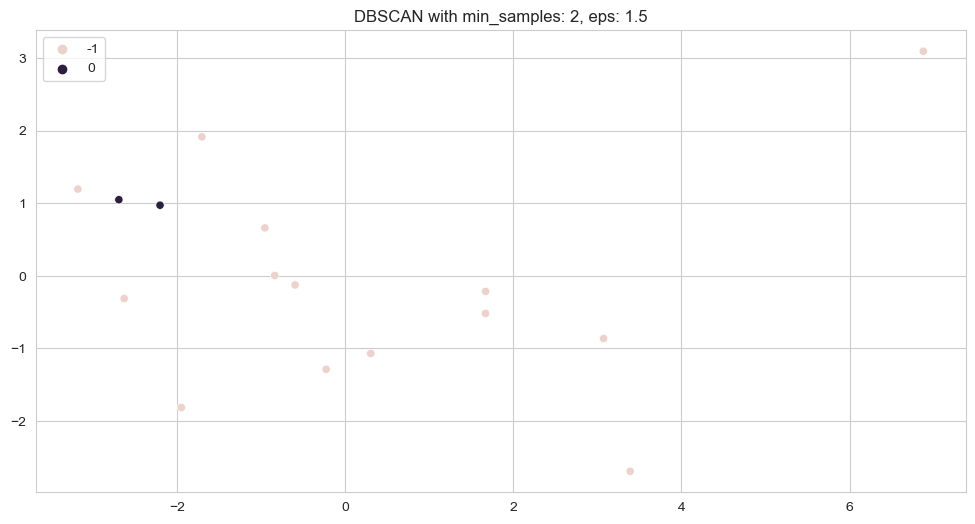

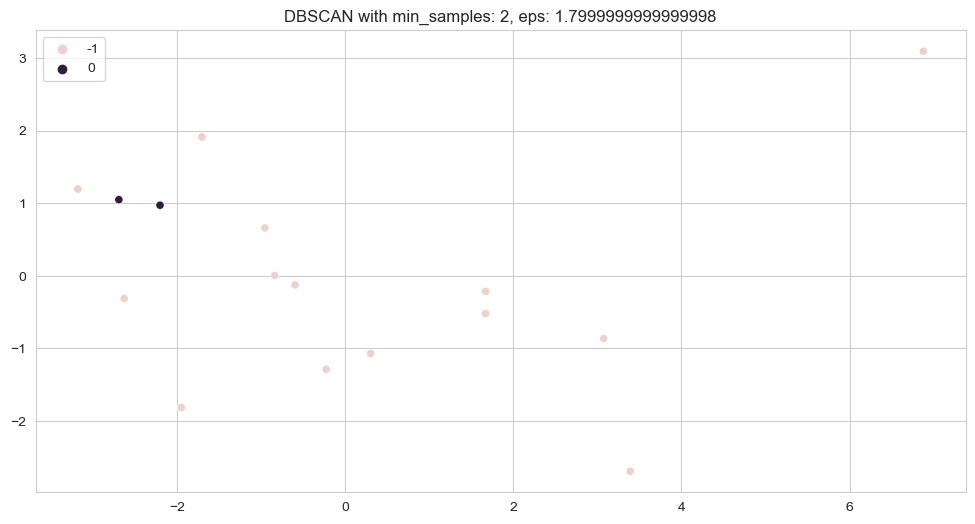

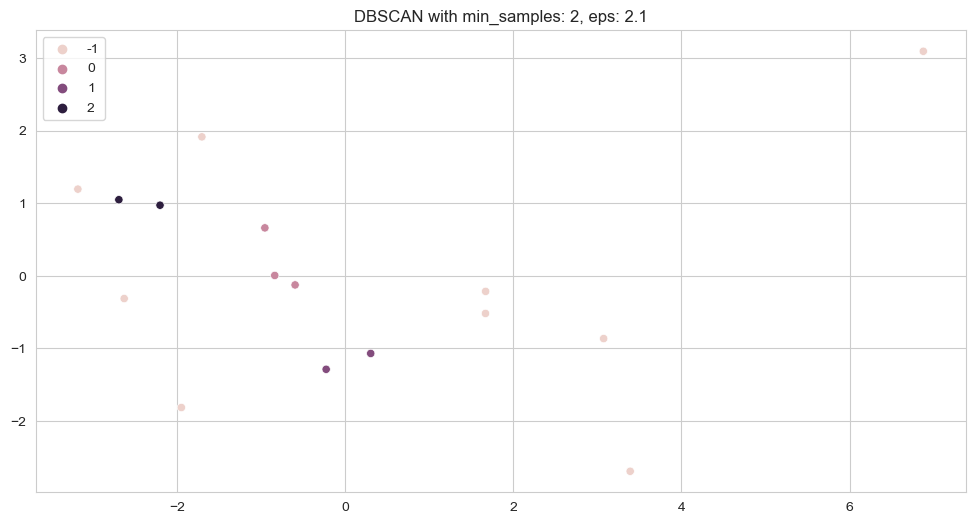

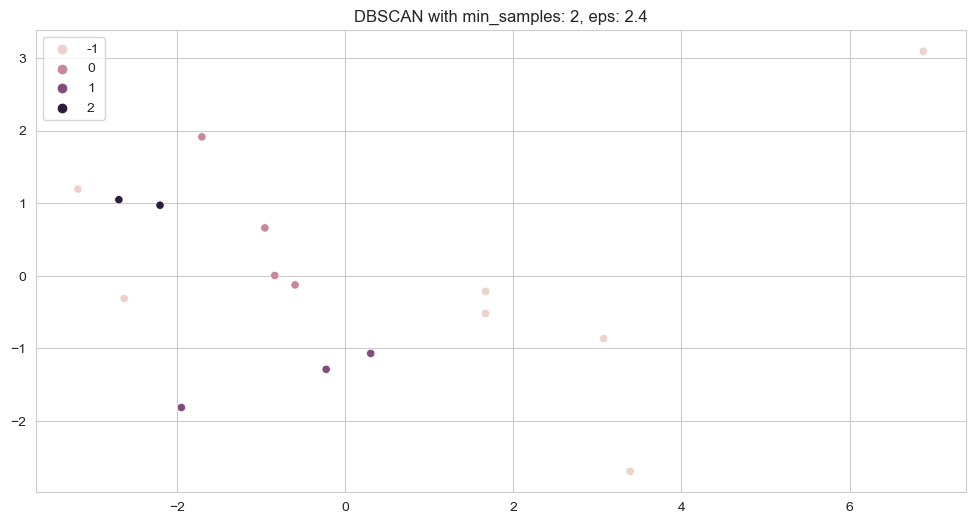

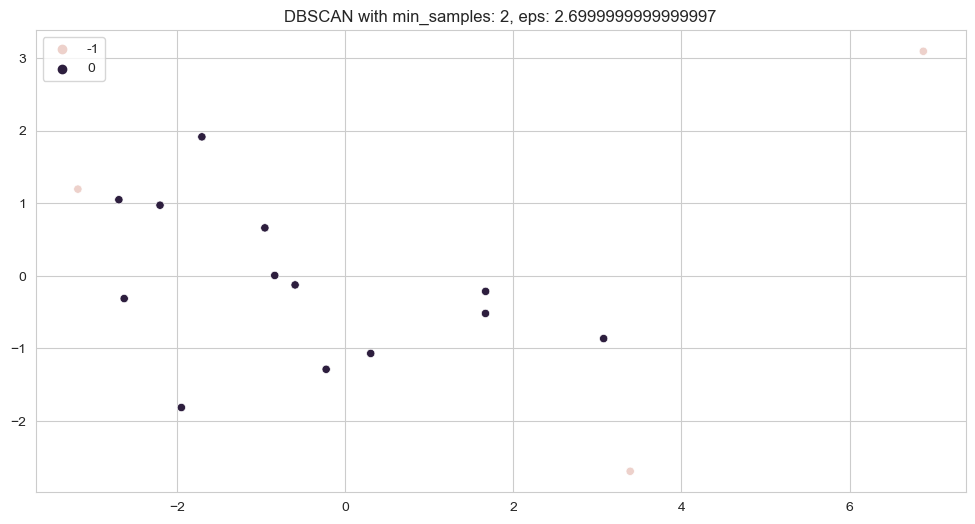

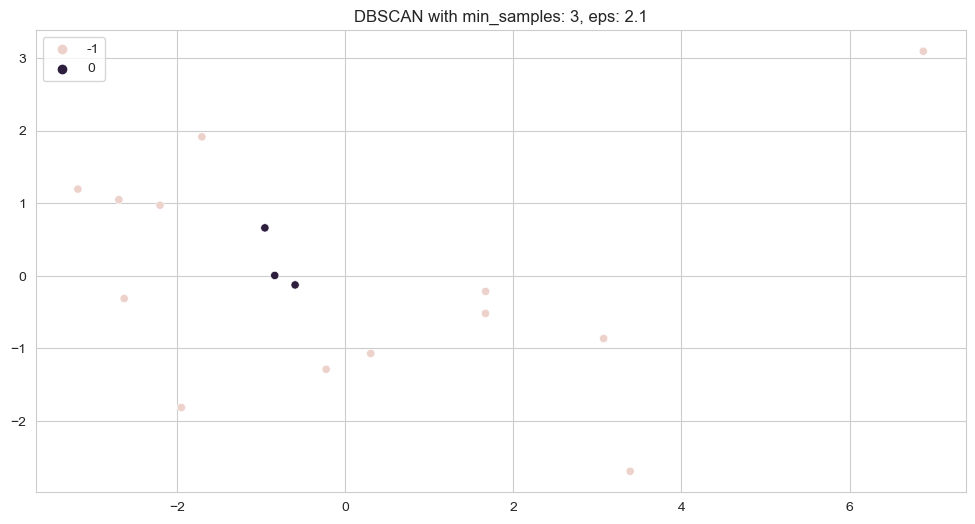

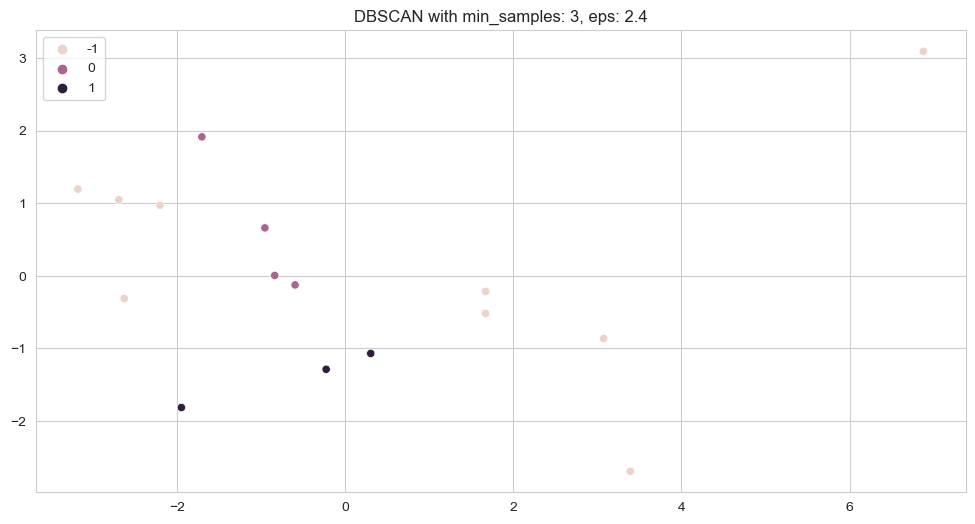

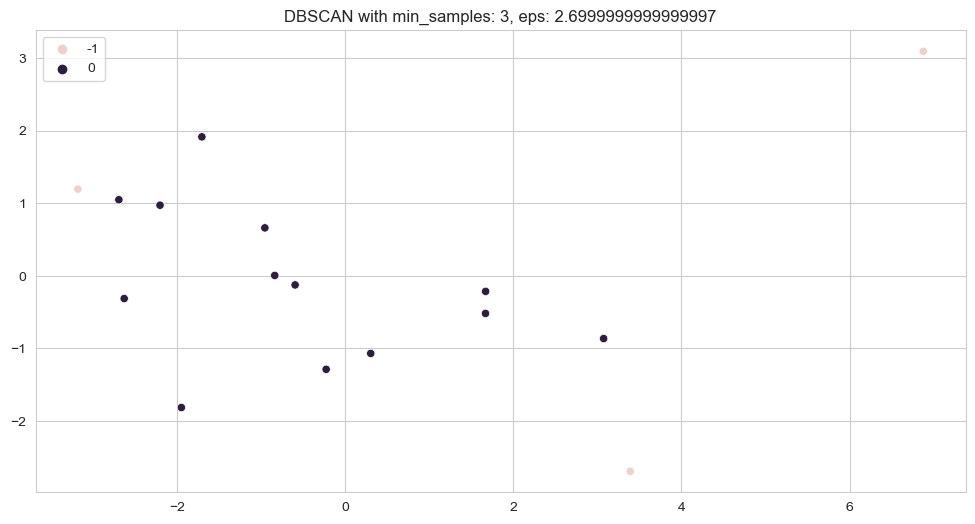

In [120]:

for i, sample in enumerate(np.arange(2, 4, 1)):
    for j, eps in enumerate(np.arange(0.3, 5, 0.3)):
        dbscan = DBSCAN(min_samples=sample, eps=eps)
        predictions = dbscan.fit_predict(X_standard_scaled)
        if sum(predictions) == -16 or sum(predictions) == - 1 or sum(predictions) == -2:
            pass
        else:
            plt.figure(figsize=(12,6))
            sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=predictions)
            plt.title(f"DBSCAN with min_samples: {sample}, eps: {eps}")


DBSCAN performed a little bit worse than K-Means and Ward method. The model is really hard to use, beacause the parameters are really sensitive for every change that we made in min_samples or eps variable.

# 5. Conclusion

As a Polish myself, I would probably go with K-Means algorithm with 4 clusters, i.e:

- First Cluster: Zachodniopomorskie, Lubuskie, Podlaskie, Warmińsko-Mazurskie
- Second Cluster: Opolskie, Kujawskie, Lubelskie, Podkarpackie, Łódzkie, Świętokrzyskie, Pomorskie
- Third Cluster: Wielkopolskie, Dolnośląskie, Małopolskie, Śląskie,
- Fourth Cluster: Mazowieckie